In [4]:
# If we generate a new image by cropping it from an older image, then we also need to change the polygon
# in order to make it fit the new cropped image.

In [1]:
#from os import listdir
from torchvision.transforms import Resize
from PIL import Image
import skimage.io as io
%matplotlib inline
from pycocotools.coco import COCO
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from skimage.transform import rescale

In [2]:
read_directory = '/media/greghovhannisyan/BackupData1/mscoco/images/train2017/'
#write_directory = '/media/greghovhannisyan/BackupData1/mscoco/images/resized_images/train_2017_224_224/'
annFile = '/media/greghovhannisyan/BackupData1/mscoco/annotations/instances/instances_train2017.json'
bbox_crop_dir = '/media/greghovhannisyan/BackupData1/mscoco/images/train2017_crop_bbox/'

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=14.34s)
creating index...
index created!


In [26]:
sample_ann_id = 906200099952
temp_list = list()
temp_list.append(sample_ann_id)
sample_ann = coco.loadAnns(temp_list)
print(sample_ann[0]['segmentation'])
print(sample_ann[0]['bbox'])
print(sample_ann[0]['segmentation'][0])

xmin = sample_ann[0]['bbox'][0]
ymin = sample_ann[0]['bbox'][1]
temp_seg = sample_ann[0]['segmentation'][0]

new_seg = list()
length = len(temp_seg)
#print(length)

for i in range(0,length, 2):
    new_seg.append(temp_seg[i]-xmin)
    new_seg.append(temp_seg[i+1]-ymin)
    
#print(temp_list)
#print(annIds)

{'counts': [70312, 12, 412, 16, 403, 25, 402, 26, 401, 26, 401, 26, 401, 26, 401, 26, 400, 27, 400, 27, 400, 26, 401, 25, 402, 23, 404, 24, 403, 25, 402, 26, 401, 27, 399, 29, 398, 29, 398, 29, 398, 29, 398, 29, 398, 29, 403, 24, 406, 21, 412, 14, 418, 8, 421, 4, 40551, 7, 419, 9, 413, 15, 404, 1, 5, 18, 400, 4, 5, 18, 399, 5, 4, 19, 398, 7, 3, 19, 397, 10, 1, 19, 397, 10, 1, 25, 389, 39, 388, 40, 386, 42, 385, 42, 385, 42, 384, 43, 383, 44, 383, 44, 383, 44, 383, 43, 384, 42, 385, 41, 386, 40, 388, 37, 391, 22, 4, 7, 394, 20, 407, 13, 414, 14, 413, 14, 413, 14, 413, 14, 413, 14, 413, 14, 413, 14, 413, 14, 379, 11, 23, 14, 378, 19, 16, 14, 377, 21, 17, 11, 377, 23, 17, 10, 377, 24, 17, 8, 378, 25, 17, 6, 379, 26, 17, 3, 381, 26, 401, 26, 401, 26, 402, 25, 402, 25, 403, 24, 403, 24, 403, 24, 403, 24, 403, 24, 403, 24, 403, 24, 403, 24, 403, 24, 403, 24, 403, 24, 403, 12, 1, 10, 405, 10, 3, 8, 407, 8, 6, 4, 411, 4, 11544, 13, 426, 2, 396, 8, 6, 18, 394, 34, 392, 35, 391, 36, 391, 36, 391

KeyError: 0

In [5]:
sample_ann[0]['segmentation'][0] = new_seg

(97, 42, 3)


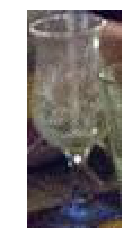

In [6]:
I = io.imread(bbox_crop_dir + str(sample_ann_id) + '.jpg')
print(I.shape)
plt.figure(); plt.axis('off')
plt.imshow(I)

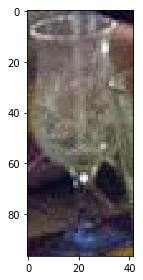

In [7]:
io.imshow(I)

<class 'int'>


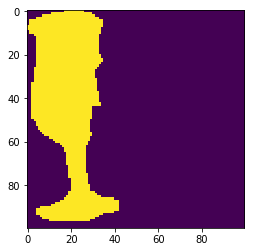

In [8]:
t_list = list()
t_list.append(sample_ann)
print(type(sample_ann[0]['image_id']))

#print(sample_ann[0]['segmentation'][0])

plt.imshow(coco.annToMask(sample_ann[0])[0:100,0:100])

(116, 105, 3)


/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


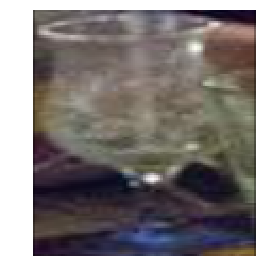

In [9]:
I = io.imread(bbox_crop_dir + str(sample_ann_id) + '.jpg')
#re_I = rescale(I,(1.2,2.5))
re_I = resize(I, (116, 105))
print(re_I.shape)
plt.figure(); plt.axis('off')
io.imshow(re_I)
#io.imshow(rescale(I,(1.2,2.5)))

In [10]:
height_old, width_old, _ = I.shape
height_new, width_new, _ = re_I.shape

x_ratio = width_new / width_old
y_ratio = height_new / height_old

print(x_ratio)
print(y_ratio)

res_seg = list()

temp_seg1 = sample_ann[0]['segmentation'][0]

for i in range(0,length, 2):
    res_seg.append(temp_seg1[i] * x_ratio)
    res_seg.append(temp_seg1[i+1] * y_ratio)
    
sample_ann[0]['segmentation'][0] = res_seg    

2.5
1.1958762886597938


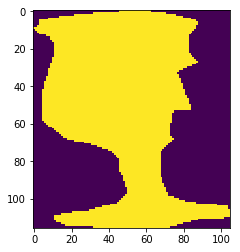

In [11]:
re_list = list()
re_list.append(sample_ann)
#print(type(sample_ann[0]['image_id']))

#print(sample_ann[0]['segmentation'][0])

plt.imshow(coco.annToMask(sample_ann[0])[0:116,0:105])

In [13]:
sample_ann[0]['segmentation'][0]

88.10000000000002

In [16]:
x_list = list()
y_list = list()

for i in range(0, len(sample_ann[0]['segmentation'][0]), 2):
    x_list.append(sample_ann[0]['segmentation'][0][i])
    y_list.append(sample_ann[0]['segmentation'][0][i+1])
    print("x: " + str(sample_ann[0]['segmentation'][0][i]))
    print("y: " + str(sample_ann[0]['segmentation'][0][i+1]))

x: 88.10000000000002
y: 5.776082474226785
x: 73.62499999999997
y: 1.7340206185566873
x: 59.12499999999994
y: 0.0
x: 43.44999999999999
y: 0.5859793814432759
x: 27.749999999999986
y: 1.7340206185566873
x: 14.47499999999998
y: 3.4680412371133746
x: 3.6249999999999716
y: 5.202061855670096
x: 2.399999999999949
y: 8.658144329896883
x: 0.0
y: 9.244123711340194
x: 3.6249999999999716
y: 12.700206185567016
x: 8.449999999999989
y: 13.860206185567014
x: 10.849999999999937
y: 17.90226804123711
x: 10.849999999999937
y: 23.678350515463897
x: 4.824999999999946
y: 44.45072164948452
x: 4.824999999999946
y: 53.12082474226803
x: 4.824999999999946
y: 58.884948453608224
x: 13.275000000000006
y: 65.23505154639173
x: 18.09999999999995
y: 68.70309278350514
x: 28.94999999999996
y: 71.01113402061856
x: 41.02499999999999
y: 75.05319587628864
x: 45.84999999999994
y: 79.66927835051547
x: 45.84999999999994
y: 83.71134020618557
x: 50.674999999999955
y: 96.99752577319589
x: 44.64999999999996
y: 102.7616494845361
x: 35

In [19]:
print(max(x_list))
print(max(y_list))

106.1999999999999
116.04783505154634
